In [1]:
from keras.applications import InceptionV3
IMG_WIDTH = 299
IMG_HEIGHT = 299
LABEL = {'king':0,'ceo':1,'ath':2,'ent':3,'pro':4}
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(IMG_WIDTH,IMG_HEIGHT,3))

Using TensorFlow backend.


In [2]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [3]:
from keras.layers import Dense,GlobalAveragePooling2D,Lambda
from keras.models import Model
from keras.optimizers import Adadelta

MODEL_CLASSES = 5
x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
# x = Dropout(0.4)(x)
x = Dense(2048,activation='relu')(x)
for i in range(MODEL_CLASSES):
    hidden = Dense(2048,activation='relu')(x)
king = Dense(1, activation='sigmoid',name='king')(hidden)
print(king)
ceo = Dense(1, activation='sigmoid',name='ceo')(hidden)
ath = Dense(1, activation='sigmoid',name='ath')(hidden)
ent = Dense(1, activation='sigmoid',name='ent')(hidden)
pro = Dense(1, activation='sigmoid',name='pro')(hidden)

model = Model(inputs=base_model.input, outputs=[king,ceo,ath,ent,pro])

adad = Adadelta()

Tensor("king/Sigmoid:0", shape=(None, 1), dtype=float32)


In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
model.compile(optimizer=adad, loss=['binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy','binary_crossentropy',],metrics=['accuracy'])

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [7]:
import os
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import scipy.misc
from keras.utils import np_utils

base_dir = 'C:/Users/CPB06GameN/Desktop/ne_deep'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

def load_img(dir):
    x_list = []
    y_list = []
    for file in sorted(os.listdir(dir)):
        x_list.append(image.load_img(os.path.join(dir,file)))
        tmp = [0,0,0,0,0]
        tmp[LABEL[file.split('_')[0]]] = 1
        print(tmp)
        y_list.append(tmp)
    return x_list,y_list

x_train,y_train = load_img(train_dir)
print(y_train)
x_val,y_val = load_img(validation_dir)
x_test,y_test = load_img(test_dir)

y_train = np.asarray(y_train,dtype='float32')
y_val = np.asarray(y_val,dtype='float32')
y_test = np.asarray(y_test,dtype='float32')

def modify_xshape(data):
    new_shape = (IMG_WIDTH,IMG_HEIGHT,3)
    data_new = np.empty(shape=(len(data),)+new_shape)
    for idx in range(len(data)):
        data_new[idx] = scipy.misc.imresize(data[idx], new_shape)
    return data_new

x_train = modify_xshape(x_train)
x_val = modify_xshape(x_val)
x_test = modify_xshape(x_test)

BATCH_SIZE = 20
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rotation_range=25, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1

[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0

[1, 0, 0, 0, 0]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1

C:\BigData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [8]:
def generate_data_generator(generator, x, y,batch_size=BATCH_SIZE):
    data = generator.flow(x,y,batch_size=batch_size)
    for batch_x,batch_y in data:
        yield (batch_x,batch_y)

In [9]:
a= generate_data_generator(train_datagen,x_train,y_train)


873
873
20 20
[0. 0. 0. 1. 0.]


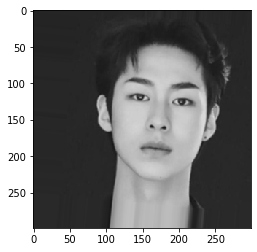

[1. 0. 0. 0. 0.]


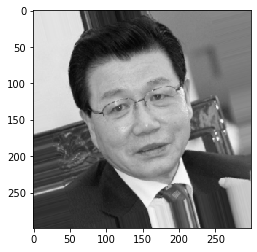

[1. 0. 0. 0. 0.]


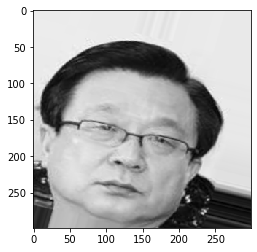

[1. 0. 0. 0. 0.]


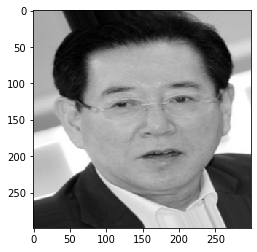

[0. 0. 0. 0. 1.]


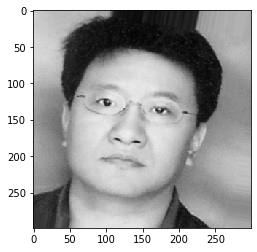

[0. 0. 1. 0. 0.]


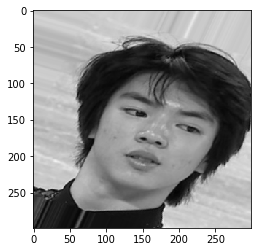

[1. 0. 0. 0. 0.]


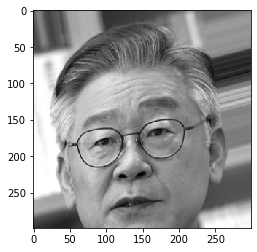

[0. 0. 0. 1. 0.]


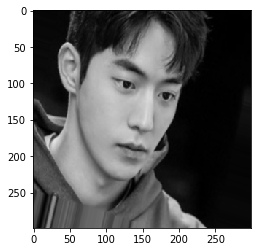

[0. 1. 0. 0. 0.]


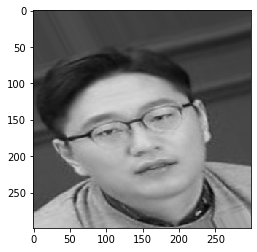

[0. 1. 0. 0. 0.]


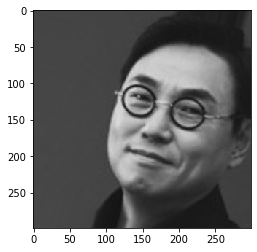

[0. 0. 0. 0. 1.]


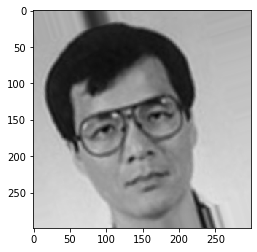

[1. 0. 0. 0. 0.]


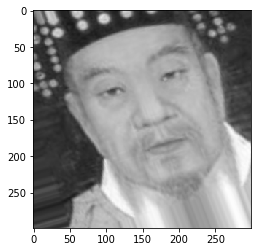

[1. 0. 0. 0. 0.]


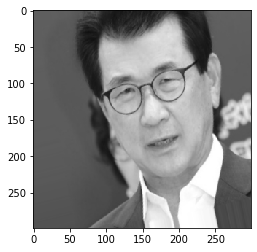

[0. 0. 0. 1. 0.]


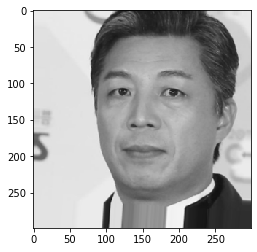

[0. 0. 1. 0. 0.]


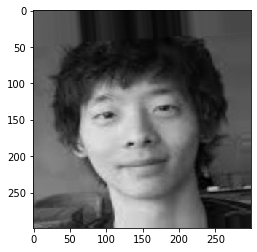

[0. 1. 0. 0. 0.]


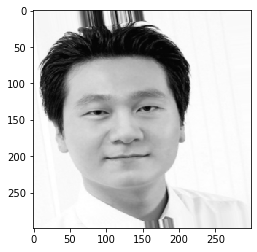

[0. 1. 0. 0. 0.]


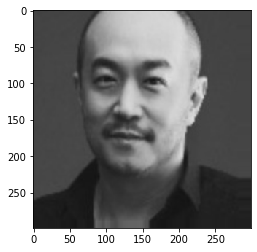

[0. 0. 0. 0. 1.]


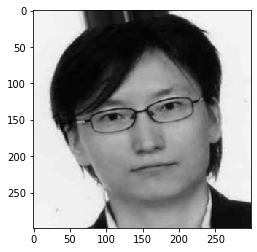

[1. 0. 0. 0. 0.]


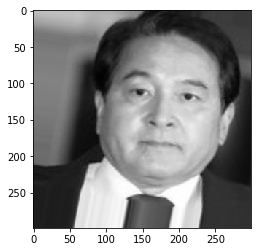

[0. 0. 0. 1. 0.]


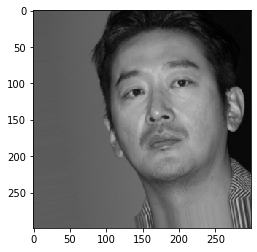

In [10]:
import matplotlib.pyplot as plt
print(len(x_train))
print(len(y_train))

for x,y in a:

    print(len(x),len(y))
    for i in range(len(x)):
        print(y[i])
        plt.imshow(x[i])
        plt.show()

    break
    


In [2]:
history = model.fit_generator(generator=generate_data_generator(train_datagen,x_train,y_train),
                    steps_per_epoch=len(x_train) / BATCH_SIZE,
                    validation_data=generate_data_generator(test_datagen,x_val,y_val),
                    validation_steps=len(x_val) / BATCH_SIZE,
                    epochs=EPOCHS)
MODEL_FILE = 'inception_v3_face.h5'

model.save(MODEL_FILE)


NameError: name 'model' is not defined

In [14]:
history=model.fit([x_train,y_train],[x_val,y_val],epochs=EPOCHS,batch_size=BATCH_SIZE)
MODEL_FILE = 'inception_v3_face.h5'

model.save(MODEL_FILE)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2 arrays: [array([[[[188., 188., 188.],
         [188., 188., 188.],
         [188., 188., 188.],
         ...,
         [164., 164., 164.],
         [166., 166., 166.],
         [170., 170., 170.]],

        [...

In [13]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

athlete


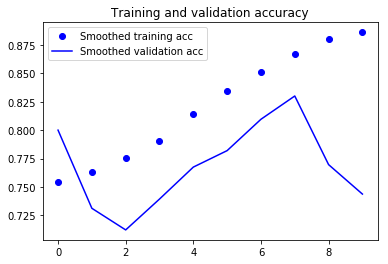

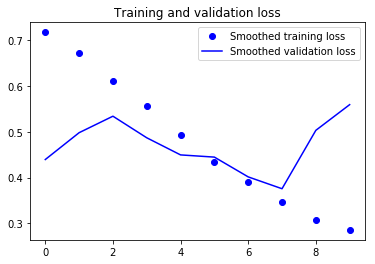

celebrity


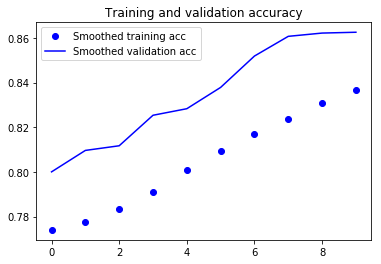

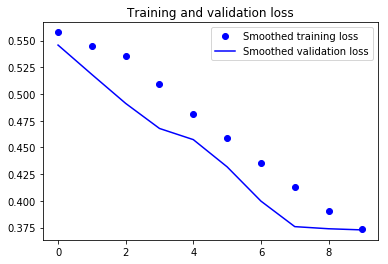

ceo


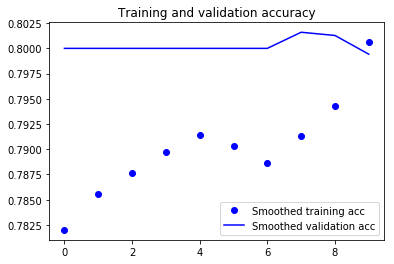

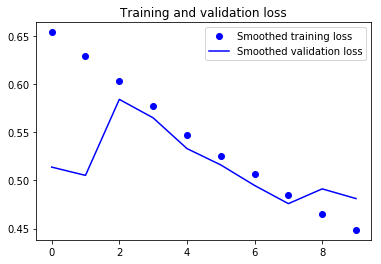

crime


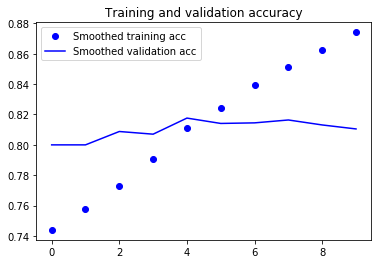

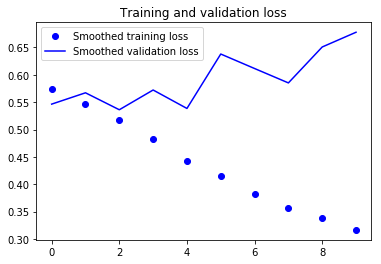

professor


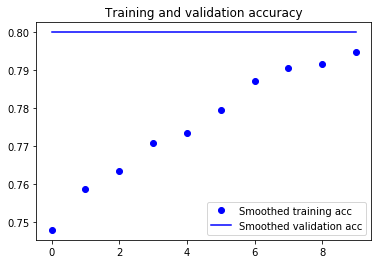

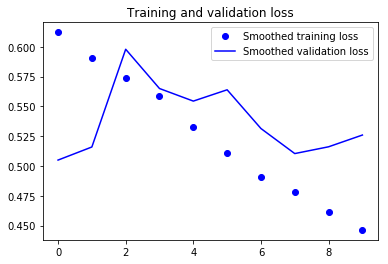

In [17]:
for i in ['athlete','celebrity','ceo','crime','professor']:
    print(i)
    acc = history.history[i+'_acc']
    val_acc = history.history['val_'+i+'_acc']
    loss = history.history[i+'_loss']
    val_loss = history.history['val_'+i+'_loss']

    epochs = range(len(acc))

    plt.plot(epochs,
             smooth_curve(acc), 'bo', label='Smoothed training acc')
    plt.plot(epochs,
             smooth_curve(val_acc), 'b', label='Smoothed validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs,
             smooth_curve(loss), 'bo', label='Smoothed training loss')
    plt.plot(epochs,
             smooth_curve(val_loss), 'b', label='Smoothed validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [2]:
from keras.models import load_model
model = load_model('./inception_v3_face.h5')

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [5]:
for layer in model.layers:
    print(layer.output_shape)
    print(layer.)

(None, 299, 299, 3)
(None, 149, 149, 32)
(None, 149, 149, 32)
(None, 149, 149, 32)
(None, 147, 147, 32)
(None, 147, 147, 32)
(None, 147, 147, 32)
(None, 147, 147, 64)
(None, 147, 147, 64)
(None, 147, 147, 64)
(None, 73, 73, 64)
(None, 73, 73, 80)
(None, 73, 73, 80)
(None, 73, 73, 80)
(None, 71, 71, 192)
(None, 71, 71, 192)
(None, 71, 71, 192)
(None, 35, 35, 192)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 192)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 96)
(None, 35, 35, 32)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 96)
(None, 35, 35, 32)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 96)
(None, 35, 35, 32)
(None, 35, 35, 256)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 64)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 48)
(None, 35, 35, 96)
(None, 35, 35, 256)
(None

In [1]:
import os
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import scipy
from keras.utils import np_utils
def load_img(dir):
    x = image.load_img(dir)
    return [x,]
def modify_xshape(data):
    new_shape = (299,299,3)
    data_new = np.empty(shape=(len(data),)+new_shape)
    for idx in range(len(data)):
        data_new[idx] = scipy.misc.imresize(data[idx], new_shape)
    return data_new

#y_predict = model.predict(modify_xshape(load_img('./test/ceo_66.jpg')))




ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [28]:
for i in y_predict:
    print(i.shape)
    print(round(i[0][0]*100,50))

(1, 1)
2.2899001163549147e-17
(1, 1)
2.2702694331190279e-32
(1, 1)
0.0
(1, 1)
0.0
(1, 1)
0.0
